<a href="https://colab.research.google.com/github/lituldust/Machine-Learning-Study/blob/main/Convolutional_Neural_Network_CIFAR_Images_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

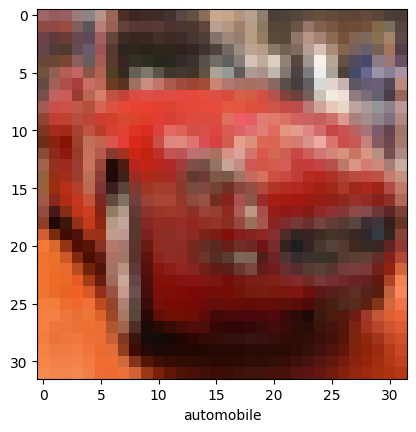

In [9]:
IMG_INDEX = 5

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

**CNN Architecture**

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

**Adding Dense Layers**

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

**Training**

In [14]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs = 10,
                    validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 90s 55ms/step - loss: 1.4936 - accuracy: 0.4550 - val_loss: 1.2516 - val_accuracy: 0.5479
Epoch 2/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.1322 - accuracy: 0.5979 - val_loss: 1.0456 - val_accuracy: 0.6354
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9927 - accuracy: 0.6506 - val_loss: 1.0117 - val_accuracy: 0.6444
Epoch 4/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.9009 - accuracy: 0.6853 - val_loss: 0.9170 - val_accuracy: 0.6776
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8300 - accuracy: 0.7084 - val_loss: 0.8778 - val_accuracy: 0.6973
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7761 - accuracy: 0.7271 - val_loss: 0.8800 - val_accuracy: 0.6987
Epoch 7/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7320 - accuracy: 0.7439 - val_loss: 0.8614 -

**Evaluating the Model**

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print(test_acc)

313/313 - 3s - loss: 0.8895 - accuracy: 0.7100 - 3s/epoch - 11ms/step
0.7099999785423279


**Data Augmentation**

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_img = train_images[14]
img = image.img_to_array(test_img)
img = img.reshape((1,) + img.shape)

i = 0

for batch in datagen.flow(img, save_prefix = 'test', save_format = 'jpeg'):
  plt.figure()
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i > 4:
    break

plt.show()

**Pretrained Model**

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

**Dataset for Pretrained Model**

In [18]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# 80% training, 10% testing, 10% validation
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split = ['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info = True,
    as_supervised = True
)

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


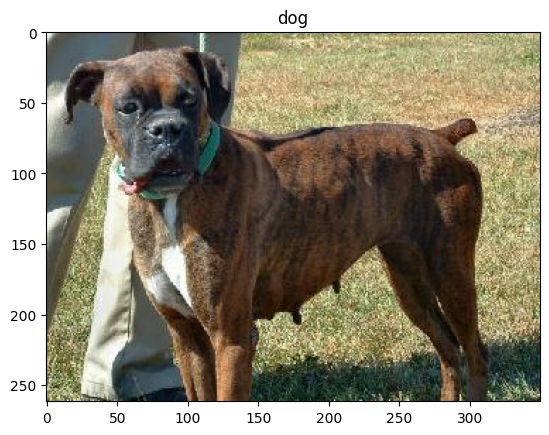

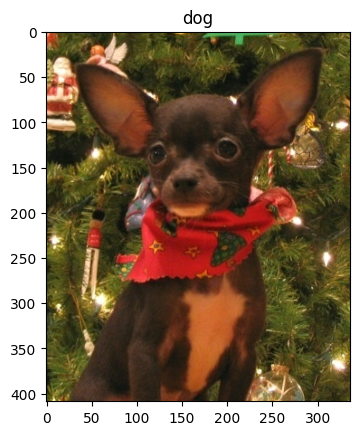

In [19]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

**Data Preprocessing**

Modify the image so it have the same size

In [25]:
IMG_SIZE = 160

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image / 127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

In [21]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

In [ ]:
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

In [27]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches =train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [28]:
for img, label in raw_train.take(2):
  print("Original shape: ", img.shape)

for img, label in train.take(2):
  print("New shape: ", img.shape)

Original shape:  (262, 350, 3)
Original shape:  (409, 336, 3)
New shape:  (160, 160, 3)
New shape:  (160, 160, 3)


**Picking a Pretrained Model**

In [30]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape = IMG_SHAPE,
                                              include_top = False,
                                              weights = 'imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [32]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

In [34]:
for image, _ in train_batches.take(1):
  pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


**Freezing the Base**

In [35]:
base_model.trainable = False

In [36]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

**Adding Classifier**

In [37]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [38]:
prediction_layer = keras.layers.Dense(1)

In [40]:
model = tf.keras.Sequential([base_model,
                             global_average_layer,
                             prediction_layer])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


**Training the Model**

In [44]:
base_learning_rate = 0.0001
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = base_learning_rate),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [46]:
initial_epochs = 3
validation_steps = 20

loss0, accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 15s 593ms/step - loss: 0.8993 - accuracy: 0.4891


In [ ]:
history = model.fit(train_batches,
                    epochs = initial_epochs,
                    validation_data = validation_batches)

acc = history.history['accuracy']
print(acc)

Epoch 1/3
582/582 [==============================] - 397s 673ms/step - loss: 0.0743 - accuracy: 0.9709 - val_loss: 0.0472 - val_accuracy: 0.9828
Epoch 2/3
582/582 [==============================] - 361s 617ms/step - loss: 0.0435 - accuracy: 0.9838 - val_loss: 0.0475 - val_accuracy: 0.9828
Epoch 3/3
458/582 [======================>.......] - ETA: 1:07 - loss: 0.0397 - accuracy: 0.9856

In [48]:
model.save("dogs_vs_cats.h5")
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
